# Stima $R_t$

**TEST PLOTLY**

La stima di $R_t$ è effettuata mediante il modello semplificato **RKI**

https://covid19.infn.it/sommario/rt-info.html

In [43]:
import matplotlib.pyplot as plt

from aidam.math_utils import moving_function_rev1
#from aidam.miscellanea_utils import find_matlabstyle
from aidam.aicharts import get_subplot_cells_sequence, auto_grid_shape
#import pickle as pkl
import numpy as np
from covid_lib import read_covid_data, find_day_index


import plotly
import plotly.graph_objs as go

## Lettura dati

In [44]:
trend,regioni,giorni,giorno_settimana,popolazione,day_counter=read_covid_data('stored_data.pkl')

Giorni osservati: 344
Primo giorno: 2020-02-24T18:00:00
Ultimo giorno: 2021-02-01T17:00:00


## Costanti e parametri

In [45]:
end_day=len(giorni)-1
start_day=end_day-120


regione='Toscana'

print('Rt sarà stimato per %s dal %s al %s'%(regione,giorni[start_day][0:10],giorni[end_day][0:10]))

Rt sarà stimato per Toscana dal 2020-10-04 al 2021-02-01


## Calcolo modello KRI

In [46]:
numero_giorni=end_day-start_day

kdays=4

# estendo le regioni con l'Italia
regioni_plus=list(regioni)
regioni_plus.append('Italia')
regioni_plus=np.asarray(regioni_plus)

In [47]:
rt={}
for regione in regioni_plus:
    rt[regione]=np.zeros(numero_giorni)
    for i,day in enumerate(range(start_day,end_day)):
        temp1=trend['totale_positivi'][regione][day-kdays:day]
        temp2=trend['totale_positivi'][regione][day-2*kdays:day-kdays]
        rt[regione][i]=np.sum(temp1)/np.sum(temp2)    

### Plot in grid di tutte le regioni

In [48]:
# per i subplot determina la griglia
grid_shape=(7,3)
grid_seq=get_subplot_cells_sequence(grid_shape)

# dimensioni figure (figsize) per figure singole e figure composte (subplot)
figsize_single=(9,6)
figsize_multi=(16,16)

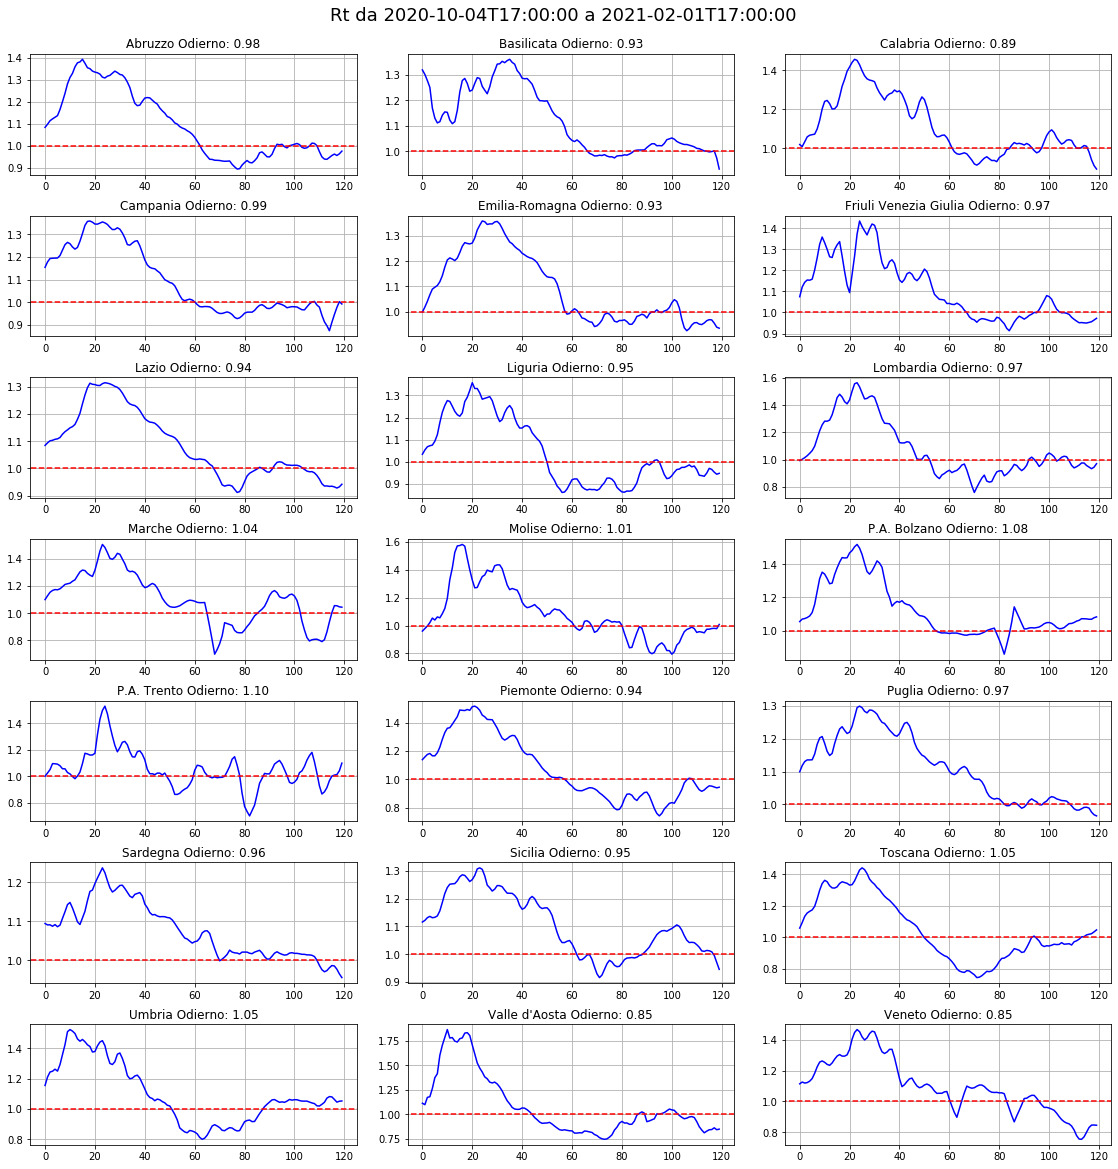

In [49]:
fig,ax=plt.subplots(grid_shape[0],grid_shape[1],sharey=False,figsize=figsize_multi)
fig.suptitle('Rt da %s a %s'%(giorni[start_day],giorni[end_day]), y=1.02,fontsize=18)
fig.tight_layout(pad=2.0)

for i,regione in enumerate(regioni):
    ax[grid_seq[i]].plot(rt[regione],'b-',linewidth=1.5)
    ax[grid_seq[i]].set_title(regione+' Odierno: %.2f'%rt[regione][-1])
    ax[grid_seq[i]].axhline(1,-0.5,numero_giorni,c='r', ls='--')
    #ax[grid_seq[i]].legend()
    ax[grid_seq[i]].grid()

### Plot regioni specifiche

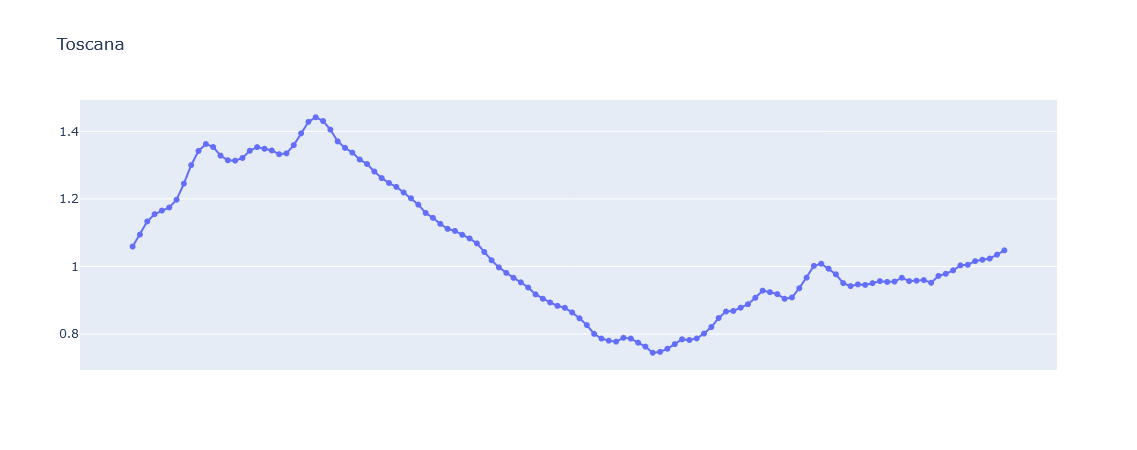

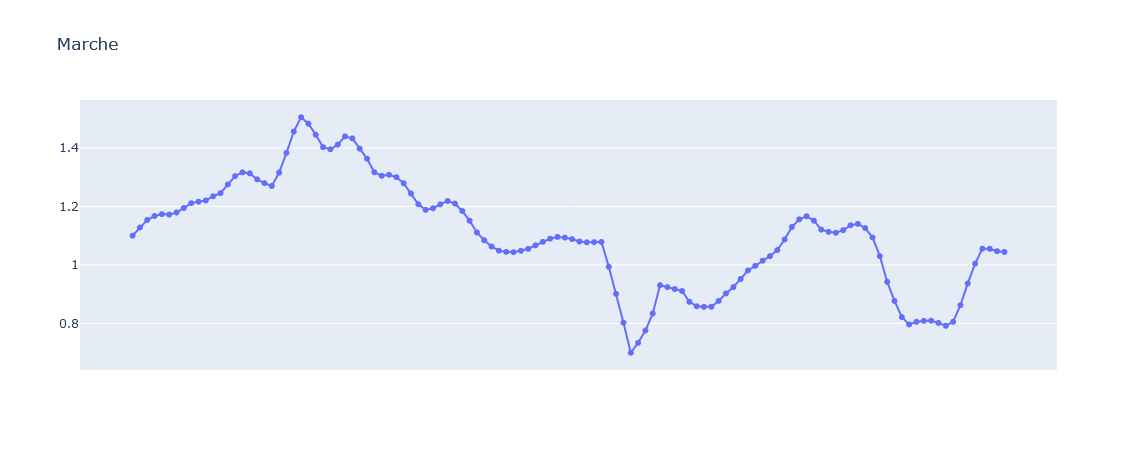

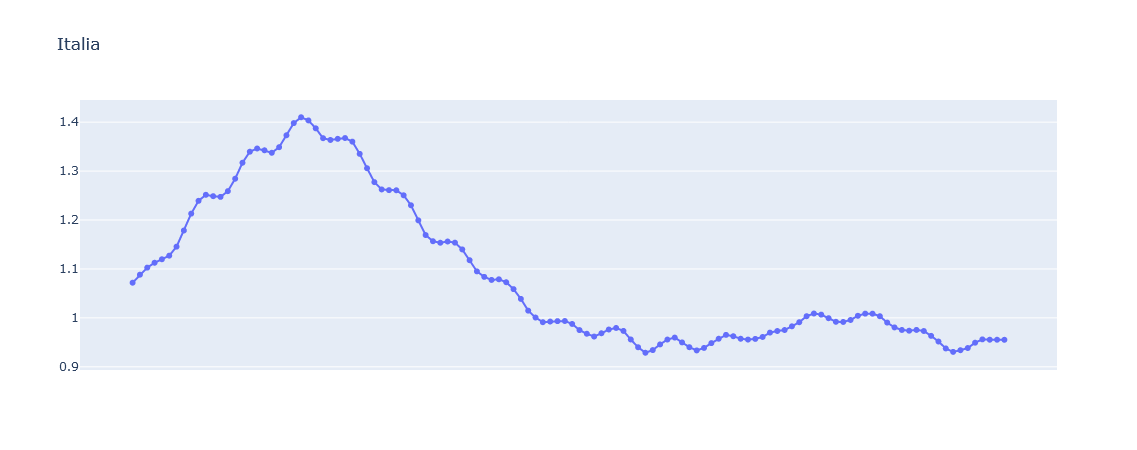

"    \n    fig,ax=plt.subplots(1,figsize=(16,5))\n    ax.plot(rt[regione],marker='o')\n    #ax.plot(moving_function_rev1(rt,np.mean,6,6),color='red',linestyle='--',linewidth=3)\n    ax.set_title('Stima Rt per %s dal %s al %s - Odierno %.2f'%(regione,giorni[start_day][0:10],giorni[end_day][0:10],rt[regione][-1]))\n    ax.set_xticks(list(range(0,numero_giorni,7)))\n    ax.set_xticklabels(giorni[list(range(start_day,end_day,7))],rotation=90)\n    ax.set_ylabel('Rt')\n    ax.grid()\n"

In [56]:
regioni_selected=['Toscana','Marche','Italia']


label_giorni=np.array([g[0:10] for g in giorni])

for regione in regioni_selected:
    trace = go.Scatter(
        x=label_giorni,
        y = rt[regione],
        mode = 'lines+markers')
    fig=go.Figure(data=trace)
    
    fig.update_layout(
        title=regione,
        xaxis = dict(
            tickmode = 'array',
            tickangle=270,
            tickvals = list(range(0,numero_giorni,7)),
            ticktext = label_giorni[list(range(start_day,end_day,7))]))
  
    fig.show()
    
    
    
'''    
    fig,ax=plt.subplots(1,figsize=(16,5))
    ax.plot(rt[regione],marker='o')
    #ax.plot(moving_function_rev1(rt,np.mean,6,6),color='red',linestyle='--',linewidth=3)
    ax.set_title('Stima Rt per %s dal %s al %s - Odierno %.2f'%(regione,giorni[start_day][0:10],giorni[end_day][0:10],rt[regione][-1]))
    ax.set_xticks(list(range(0,numero_giorni,7)))
    ax.set_xticklabels(giorni[list(range(start_day,end_day,7))],rotation=90)
    ax.set_ylabel('Rt')
    ax.grid()
'''

## Bar charts fra regioni

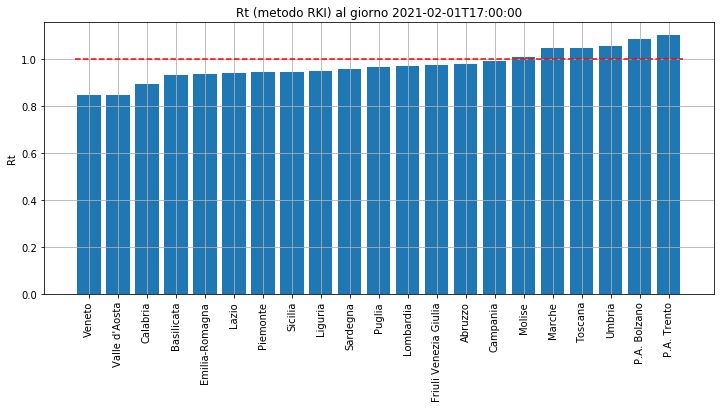

In [34]:
valori=np.array([rt[r][-1] for r in regioni])
ordine=np.argsort(valori)

plt.figure(figsize=(12,5))
plt.title('Rt (metodo RKI) al giorno %s'%giorni[-1])
plt.bar(range(len(regioni)),valori[ordine])
plt.hlines(1,-0.5,20.5,colors='r', linestyles='--')
plt.xticks(range(len(regioni)),regioni[ordine],rotation=90)
plt.ylabel('Rt')
plt.grid()
plt.show()


## Heatmap

In [35]:
import seaborn as sns
import pandas as pd

In [36]:
rt_df=pd.DataFrame(rt)

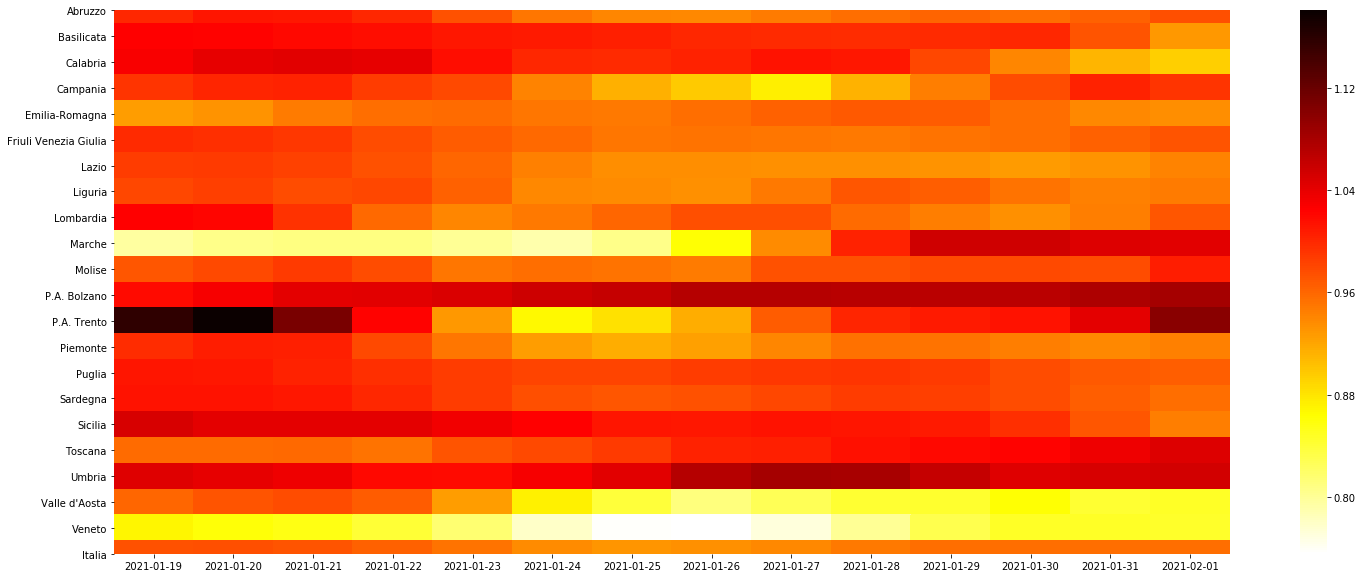

In [37]:
last_days=14

giorni_labels=[g[0:10] for g in giorni[-last_days:]]

fig, ax = plt.subplots(figsize=(25,10)) 
sns.heatmap(rt_df.iloc[-last_days:].transpose(),ax=ax,cmap='hot_r',xticklabels=giorni_labels)

## Tendenza

Differenza in $R_t$ negli ultimi giorni per le varie regioni

In [38]:
giorni_tendenza=7

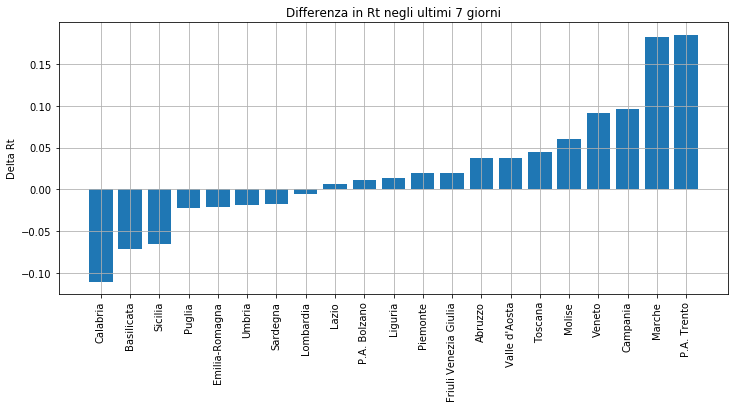

In [39]:
tendenza=np.array([rt[r][-1]-rt[r][-giorni_tendenza] for r in regioni])
ordine=np.argsort(tendenza)

plt.figure(figsize=(12,5))
plt.title('Differenza in Rt negli ultimi %d giorni'%giorni_tendenza)
plt.bar(range(len(regioni)),tendenza[ordine])
plt.xticks(range(len(regioni)),regioni[ordine],rotation=90)
plt.ylabel('Delta Rt')
plt.grid()
plt.show()

#### Salvataggio Rt su file esterno 

In [40]:
import pandas as pd

In [41]:
rt_df=pd.DataFrame(rt,index=[x[0:10] for x in giorni[start_day:end_day]])
rt_df.to_excel('rt_regioni.xls')

In [42]:
rt_df.tail()

,Abruzzo,Basilicata,Calabria,Campania,Emilia-Romagna,Friuli Venezia Giulia,Lazio,Liguria,Lombardia,Marche,...,P.A. Trento,Piemonte,Puglia,Sardegna,Sicilia,Toscana,Umbria,Valle d'Aosta,Veneto,Italia
2021-01-27,0.956381,0.996906,1.010429,0.911928,0.968680,0.949803,0.934672,0.970412,0.957775,1.004290,...,1.002067,0.954080,0.991617,0.986994,1.012419,1.015798,1.079609,0.841851,0.801408,0.949204
2021-01-28,0.962779,0.998308,0.980454,0.946203,0.967733,0.952824,0.932177,0.965472,0.946106,1.055497,...,1.009653,0.951942,0.988875,0.985808,1.008715,1.019971,1.062750,0.843863,0.831780,0.956044
2021-01-29,0.956447,1.001046,0.940738,0.977356,0.954899,0.955993,0.927959,0.953177,0.934260,1.054912,...,1.013649,0.945805,0.976586,0.977462,0.995873,1.023566,1.045132,0.861751,0.847249,0.955324
2021-01-30,0.964009,0.972947,0.911413,1.003252,0.939112,0.963988,0.932400,0.943799,0.945822,1.046736,...,1.042695,0.939691,0.968758,0.965638,0.970515,1.035003,1.051115,0.842271,0.847801,0.955333
2021-01-31,0.976252,0.929675,0.893866,0.992604,0.934964,0.972173,0.941973,0.947841,0.971211,1.044216,...,1.100097,0.944098,0.965305,0.956082,0.945377,1.047670,1.052994,0.848236,0.846274,0.955178
